In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log

Incidência = Número de casos/(População no meio do período)*5 * 10^5

In [2]:
pop = (78745*10^5)/(5*184030.8)
n(pop)

8557.80662802096

In [3]:
T1=27.4
T2=0.025
omega1=0.67
phi1=1.53
R1=196.9
R2=-0.033
omega2=0.65
phi2=1.99
B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma=1/365
R_L = 50
N=8558
M=100000
I_M0=50000 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [4]:
print(f'População suscetível inicial: {S_H0} \nPopulação infectada inicial: {I_H0}')

População suscetível inicial: 7558 
População infectada inicial: 1000


In [5]:
ratio = M/N
n(ratio)

11.6849731245618

In [6]:
def lotkavolterra(t, z, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0):
    S, I, R = z
    
    # Funções de temperatura e chuva
    def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    # Duração da fase de desenvolvimento das larvas
    def tau_L(T):
        return 1 / (c1 * T + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(T):
        return np.exp(-1 / (A*T**2 + B*T + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(T):
        return np.exp(-(c1 * T + c2))
    
    def p_LR(R):
        return (4*p_ML/R_L**2) * R * (R_L - R)
    
    def p_LRT(R,T):
        return p_LR(R)*p_LT(T)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(R):
        return (4*p_ME/R_L**2) * R * (R_L - R)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(R):
        return (4*p_MP/R_L**2) * R * (R_L - R)

    # Duração do ciclo esporogônico
    def tau_M(T):
        return DD / (T - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, T):  
        p_T = p(T)
        return p_T**tau_M

    # Definindo a taxa de mortalidade do mosquito
    def mu(T):
        return -log(p(T))

    R_curr = R(t)
    T_curr = T(t)
    
    # Calcular a taxa de mordida e probabilidade de transmissão
    def a(T):
        return (T_curr - T1) / D1
    
    a_curr = a(T_curr)
    
    def b(R,T):
        return B_E * p_ME * p_LRT(R_curr,T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)
    
    dSdt = -a_curr * b2 * (I_M0 / N) * S
    dIdt = a_curr * b2 * (I_M0 / N) * S - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt] 

In [7]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

In [8]:
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 608
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff0fa437d0>
   status: 0
  success: True
        t: array([0.00000000e+00, 5.16187658e-04, 5.67806424e-03, 5.72968300e-02,
       5.73484488e-01, 2.91709414e+00, 7.41864454e+00, 1.20693994e+01,
       1.66358045e+01, 2.18114500e+01, 2.66255108e+01, 3.09078017e+01,
       3.51900926e+01, 4.05205058e+01, 4.56060023e+01, 4.99567555e+01,
       5.43075087e+01, 5.87399224e+01, 6.31723362e+01, 6.84397420e+01,
       7.41498195e+01, 7.85104116e+01, 8.28710037e+01, 8.70588203e+01,
       9.12466368e+01, 9.64437401e+01, 1.02854957e+02, 1.07941031e+02,
       1.12622682e+02, 1.18506049e+02, 1.23383751e+02, 1.28214261e+02,
       1.33501721e+02, 1.38815514e+02, 1.42990633e+02, 1.47165753e+02,
       1.52203334e+02, 1.57420794e+02, 1.61778302e+02, 1.66135810e+02,
       1.71134607e+02, 1.76857107e+02, 1.81063186

In [9]:
# Extraindo as soluções
times = sol.t
S, I, R = sol.y

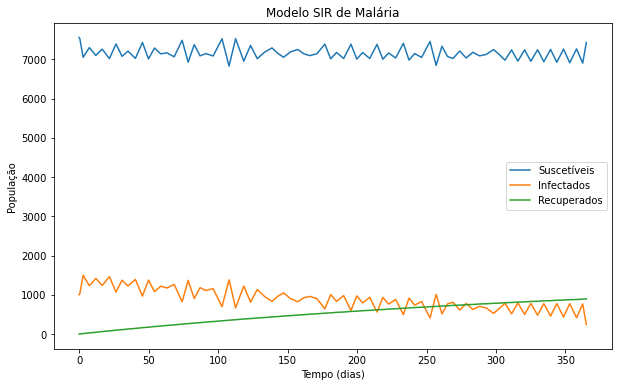

In [10]:
# Cria um gráfico com base no tempo e nos valores de S_H, I_H e R_H
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

# Define os títulos dos eixos e o título do gráfico
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

# Adiciona a legenda ao gráfico
plt.legend()

# Mostra o gráfico
plt.show()

In [11]:
# Funções de temperatura e chuva fora do contexto da função lotkavolterra
def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

# Duração do ciclo esporogônico fora do contexto da função lotkavolterra
def tau_M(T):
    return DD / (T - Tmin)

# Taxa diária de sobrevivência dos mosquitos
def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

# Função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Taxa de mortalidade do mosquito
def mu(T):
    return -np.log(p(T))

# Calcular a taxa de mordida e probabilidade de transmissão
def a(T):
    return (T - T1) / D1

# Calcular l e mu ao longo do tempo
l_values = [l(tau_M(T(t)), T(t)) for t in times]
mu_values = [mu(T(t)) for t in times]
a2_values = [(a(T(t)))^2 for t in times]

In [12]:
# Imprimir os valores de l e mu
for ti, l_value, mu_value, a2_value in zip(times, l_values, mu_values, a2_values):
    print(f"Tempo: {ti}, l: {l_value}, mu: {mu_value}, \na^2: {a2_value} ")

Tempo: 0.0, l: 0.4040242302137476, mu: 0.1115841612302408, 
a^2: 5.858636955855422e-07 
Tempo: 0.0005161876580221223, l: 0.4040276879050145, mu: 0.11158515057392686, 
a^2: 5.958333419095871e-07 
Tempo: 0.005678064238243346, l: 0.4040622459874476, mu: 0.11159504648368565, 
a^2: 7.001472862827181e-07 
Tempo: 0.05729683004045558, l: 0.4044058632175137, mu: 0.11169422866126212, 
a^2: 2.2038172285905884e-06 
Tempo: 0.573484488062578, l: 0.40757369226387297, mu: 0.1126828466713931, 
a^2: 5.988598930415622e-05 
Tempo: 2.9170941384772693, l: 0.41180983424827217, mu: 0.11427236048315846, 
a^2: 0.00029247176256517207 
Tempo: 7.418644544115587, l: 0.39283480372479307, mu: 0.10896819585910072, 
a^2: 0.00032166465421896995 
Tempo: 12.069399396793191, l: 0.41221344102466867, mu: 0.11444461502199653, 
a^2: 0.0003265439623095254 
Tempo: 16.63580451549091, l: 0.39250863758361937, mu: 0.10890574635813503, 
a^2: 0.00033948389039712063 
Tempo: 21.811450034808136, l: 0.41147577911286726, mu: 0.114132952480

In [13]:
# Calcular as médias
l_mean = np.mean(l_values)
mu_mean = np.mean(mu_values)
a2_mean = np.mean(a2_values)

print(f"Média de l: {l_mean}")
print(f"Média de mu: {mu_mean}")
print(f"Média de a^2: {a2_mean}")

Média de l: 0.40296474226991214
Média de mu: 0.111723028830021
Média de a^2: 0.00026009975593372915


Cálculo do R_0:

In [14]:
M

100000

In [15]:
N

8558

In [16]:
a2_mean

0.00026009975593372915

In [17]:
b1

0.100000000000000

In [18]:
b2

0.300000000000000

In [19]:
l_mean

0.40296474226991214

In [20]:
mu_mean

0.111723028830021

In [21]:
gamma

1/365

In [22]:
(M * a2_mean * b1 * b2 * l_mean) / (gamma * mu_mean * N)

0.12003451155381316

In [23]:
(a2_mean * b1 * b2 * l_mean) / (gamma * mu_mean * N)

1.2003451155381315e-06

In [24]:
n(1/3.128638635024638e-07)

3.19627837106258e6

In [25]:
# Calcular R0 ao longo do tempo
R0_values = [(M * a2 * b1 * b2 * l) / (gamma * mu * N) for a2, l, mu in zip(a2_values, l_values, mu_values)]
R0_values

[0.00027142089739101667,
 0.00027603958349065765,
 0.0003243654605776116,
 0.001020949171672846,
 0.027715032952056785,
 0.1348594221481445,
 0.14837317008463247,
 0.1504909145148179,
 0.15655229192948228,
 0.12273461971761811,
 0.11062392077511174,
 0.14542989081153224,
 0.16187868507364306,
 0.12700420848553484,
 0.08686863283274877,
 0.12164486370739827,
 0.14840842393236406,
 0.15967848494864376,
 0.1620582545076464,
 0.1440578597137537,
 0.04370307341544396,
 0.07792657551425629,
 0.1128234172231642,
 0.15231463829268285,
 0.1612237931868309,
 0.1519457942091981,
 0.004214736795368725,
 0.0017807096074418148,
 0.0016186999338466312,
 0.0998419995912243,
 0.11892099418324863,
 0.1318623028778633,
 0.1618744036877037,
 0.14122505770714094,
 0.16214418161563476,
 0.14655576011312962,
 0.16109695956531328,
 0.15094201206191726,
 0.16189182583654585,
 0.1575042404413148,
 0.1620786905849322,
 0.09112707212240534,
 0.13755053074163665,
 0.1614002944028259,
 0.14075953609353237,
 0.08818

Para aumentar o R0, será necessário aumentar o M e/ou as taxas de transmissão b1 e b2 e/ou o período de transmissiabilidade

#####################

In [26]:
# Inicializando os parâmetros
num_steps = 365
dt = 1
t_initial = 0
t_final = num_steps * dt
T1 = 27.4
T2 = 0.025
omega1 = 0.67
phi1 = 1.53
R1 = 196.9
R2 = -0.033
omega2 = 0.65
phi2 = 1.99
B_E = 200
p_ME = 0.9
p_ML = 0.25
p_MP = 0.75
tau_E = 1
tau_P = 1
c1 = 0.00554
c2 = -0.06737
D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 105
Tmin = 14.5
gamma = 1/120
R_L = 50
N = 8558
M = 10000
I_M0 = 5000 # None
I_H0 = 1000
if I_M0 is None:
        I_M0 = M / 100
S_H0 = N - I_H0

In [27]:
# Definindo funções auxiliares
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def p_LT(T):
    return np.exp(-(c1 * T + c2))

def p_LR(R):
    return (4*p_ML/R_L**2) * R * (R_L - R)

def p_LRT(R,T):
    return p_LR(R)*p_LT(T)

def tau_M(T):
    return DD / (T - Tmin)

def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

def mu(T):
    return -np.log(p(T))

In [28]:
# Definindo a função do sistema de equações diferenciais
def diff(t, Y):
    S_H, I_H, R_H = Y
    T_curr = T(t)
    R_curr = R(t)
    tau_M_T = tau_M(T_curr)
    l_tau_M = l(tau_M_T, T_curr)
    a = (T_curr - T1) / D1
    b = B_E * p_ME * p_LRT(R_curr, T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H
        dI_H = a * b2 * (I_M0 / N) * S_H - gamma * I_H
    else:
        dS_H = -a * b2 * (I_H / N) * S_H
        dI_H = a * b2 * (I_H / N) * S_H - gamma * I_H
    dR_H = gamma * I_H

    return [dS_H, dI_H, dR_H]

In [29]:
# Solucionando o sistema de equações diferenciais
sol = solve_ivp(diff, [t_initial, t_final], [S_H0, I_H0, 0], t_eval=np.linspace(t_initial, t_final, num_steps))

In [30]:
# Extraindo as soluções
times = sol.t
S_H, I_H, R_H = sol.y

In [31]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 134
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
  

In [32]:
times

array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
        52.14285714,  53.1456044 ,  54.14835165,  55.1510989 ,
        56.15384615,  57.15659341,  58.15934066,  59.16208791,
        60.16483516,  61.16758242,  62.17032967,  63.17

In [33]:
S_H, I_H, R_H

(array([7558.        , 7555.30041575, 7548.94299274, 7541.67081969,
        7536.66829233, 7535.8513207 , 7539.54329438, 7546.47508244,
        7553.78503346, 7557.72876088, 7558.52908797, 7557.68699458,
        7556.32084095, 7555.22150943, 7554.85240445, 7555.34945249,
        7556.52110215, 7557.84784019, 7558.25313645, 7557.60231086,
        7556.38437436, 7554.99661471, 7553.74459649, 7552.84216112,
        7552.41142681, 7552.48278862, 7552.99491841, 7553.7947649 ,
        7554.63755358, 7555.18678682, 7555.01424376, 7554.14370499,
        7554.00082693, 7554.49204348, 7555.40529965, 7556.55819694,
        7557.7979934 , 7559.00160355, 7560.07559846, 7560.95620568,
        7561.60930931, 7562.03044993, 7562.24482466, 7562.30728711,
        7562.30234741, 7562.34417222, 7562.57658469, 7563.03099589,
        7563.53451717, 7564.00715402, 7564.38457161, 7564.6174112 ,
        7564.67129008, 7564.52680163, 7564.17951528, 7563.63997654,
        7562.93370699, 7562.10120426, 7561.19794

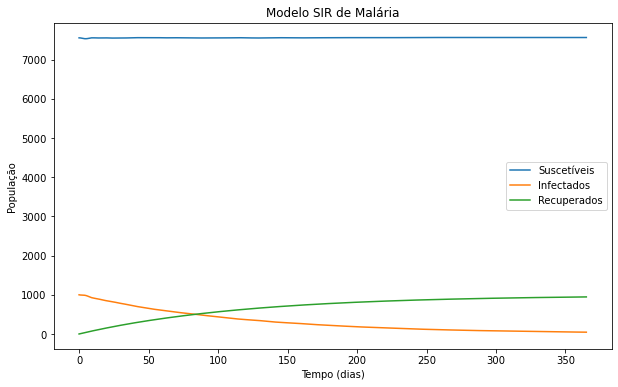

In [34]:
# Cria um gráfico com base no tempo e nos valores de S_H, I_H e R_H
plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

# Define os títulos dos eixos e o título do gráfico
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

# Adiciona a legenda ao gráfico
plt.legend()

# Mostra o gráfico
plt.show()